In [25]:
#Module Imports
import numpy as np
import numpy.random as npr
import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

In [26]:
'''DEFINITION OF VARIABLES
    S0 - Stock Price at T=0
    E - Strike Price
    T - Time in Years
    R - Risk Free Rate
    SIGMA - Volatility
    DT - Time Step = T/N
    DF - Discount Factor = e^-RT
    I - Number of Simulations
    P - Discrete Sampling Frequency for Asian Options 
        252/Annual, 126/SemiAnnual, 63/Quarterly, 21/Monthly, 1/Continuous
'''

S0 = 100
E=100
T=1
R=0.05
SIGMA=0.20
I=10000
P= 21 #Discrete Sampling Frequency 252/Annual, 126/SemiAnnual, 63/Quarterly, 21/Monthly, 1/Continuous
N=252

In [27]:
'''BSM VANILLA OPTION VALUE CALCULATION'''
def bsm_option_value(S0, E, T, R, SIGMA):   
    S0 = float(S0)
    d1 = (log(S0/E)+(R+0.05*SIGMA**2)*T)/(SIGMA*sqrt(T))
    d2 = d1-(SIGMA*sqrt(T))
    call_value = S0*stats.norm.cdf(d1,0,1) - E*exp(-R*T)*stats.norm.cdf(d2,0,1)
    put_value =  E*exp(-R*T)*stats.norm.cdf(-d2,0,1) - (S0*stats.norm.cdf(-d1,0,1))

    print("Value of Call Option BSM = %.3f " %call_value)
    print("Value of Put Option BSM =  %.3f" %put_value)
    return

In [28]:
bsm_option_value(S0, E, T, R, SIGMA)

Value of Call Option BSM = 10.420 
Value of Put Option BSM =  5.543


In [29]:
'''OPTION VALUATION - MONTE CARLO SIMULATION W/ ANTITHETIC VARIANCE REDUCTION W/ MILSTEIN SCHEME '''
def option_valuation(S0, E, T, N, SIGMA, R, I, P):    
    DT = T/N   #Time Step   
#GENERATE RANDOM NUMBERS - ANTITHETIC VARIANCE REDUCTION
    PHI = npr.standard_normal((N,int(I/2))) 
    PHI = np.concatenate((PHI, -PHI), axis=1)     
#SET UP EMPTY ARRAYS AND SET INITIAL VALUES    
    S = np.zeros_like(PHI)  #Array to Capture Asset Value Path
    S[0] = S0
    
#CREATE FOR LOOP TO GENERATE SIMULATION PATHS - MILSTEIN METHOD
    for t in range (1,N):
        S[t]=S[t-1]*(1+R*DT+(SIGMA*PHI[t]*np.sqrt(DT))+(SIGMA**2)*(0.5*(((PHI[t]**2)-1)*DT)))
    
    return S

Number of Simulations 10000
Value of Vanilla Call Option Monte Carlo = 10.411
Value of Vanilla Put Option Monte Carlo = 5.544


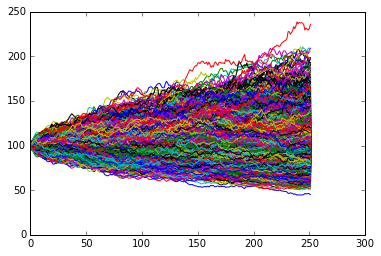

In [30]:
%matplotlib inline
#Calculation of Discounted Expected Payoff for Vanilla Options - non-Asian
S = option_valuation(S0, E, T, N, SIGMA, R, I, P)

DF = math.exp(-R*T)  #Discount Factor

print("Number of Simulations %.d" %I)

Call_Value = DF * np.sum(np.maximum(S[-1] - E, 0)) / I
print( "Value of Vanilla Call Option Monte Carlo = %.3f" %Call_Value)
Put_Value = DF * np.sum(np.maximum(E - S[-1], 0)) / I
print( "Value of Vanilla Put Option Monte Carlo = %.3f" %Put_Value)

#Create Graph of Monte Carlo Simulation
plt.plot(S)
plt.show()